# Plotting Descriptor Correlations
This notebook creates plots relating the important descriptors (determined through ROBERT analysis) to NCB stability. This script outputs SVG files of each graph.

Required input is the data which was input to ROBERT.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import glob 
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem 
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdqueries
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG=True
from rdkit import Geometry
rdDepictor.SetPreferCoordGen(True)
import itertools, random
import os, rdkit
from rdkit.Chem import PandasTools
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Descriptors

In [2]:
# key colors
paton_dark_blue = '#000080'
paton_teal_blue = '#376e8f'
paton_skyish_blue = '#529cbe'
paton_pale_blue = '#9dc2d9'
paton_dark_green = '#5c8625'
paton_light_green = '#c2d9a5'
paton_pale_green = '#d9e7c6'

paton_bright_red = '#fa0004'
paton_maroon = '#98002d'
paton_hot_pink = '#d00d44'
paton_pale_pink = '#f9cbd5'
paton_grey1 = '#b9b0a6'
paton_grey2 = '#d8d0c7'
paton_grey3 = '#f0ece7'

paton_blue = '#4865a2'
paton_dark_grey = '#808080'
paton_teal = '#127b8a'
paton_light_grey = '#bebebe'

In [3]:
# location of necessary files
aqme_input = '../Data/Predictive_Modeling_Inputs/semi-empirical_descriptors_full.csv'
dft_input = '../Data/Predictive_Modeling_Inputs/dft_descriptors_full.csv'
atom_indices_csv = '../Data/library_key_atom_indices.csv'
generated_ncbs = '../NCB_Generation/generated_ncbs.csv'

In [4]:
# reading in data frames
atom_indices = pd.read_csv(atom_indices_csv)
dft_df = pd.read_csv(dft_input)

In [5]:
# # isolating NCBs based on R3 substituent
# gen_ncb = pd.read_csv(generated_ncbs)
# # getting only reduced structures
# gen_ncb_red = gen_ncb[gen_ncb['code_name'].str.contains('reduced')]
# name_smi = gen_ncb_red[['code_name','SMILES']]
# name_r3_index = atom_indices[['Cofactor','C5sub']]

# molecules = pd.merge(name_smi,name_r3_index,
#                      left_on='code_name',right_on='Cofactor')
# molecules = molecules.drop(columns=['code_name'],axis=1)

In [6]:
# grouping by R1 substituent
R1_group = []
plot_colors = []

for idx,row in dft_df.iterrows():
    cofactor_id = str(row['Cofactor'].split('_')[0])
    if 'A' in cofactor_id:
        R1_group.append('Me')
        plot_colors.append(paton_dark_blue)
    elif 'B' in cofactor_id:
        R1_group.append('Bu')
        plot_colors.append(paton_teal_blue)
    elif 'C' in cofactor_id:
        R1_group.append('BuOH')
        plot_colors.append(paton_skyish_blue)
    elif 'D' in cofactor_id:
        R1_group.append('Oc')
        plot_colors.append(paton_pale_blue)
    elif 'E' in cofactor_id:
        R1_group.append('Ph')
        plot_colors.append(paton_dark_green)  
    elif 'F' in cofactor_id:
        R1_group.append('Bn')
        plot_colors.append(paton_light_green)
    elif 'G' in cofactor_id:
        R1_group.append('CH22Ph')
        plot_colors.append(paton_dark_grey)
    elif 'H' in cofactor_id:
        R1_group.append('CH23Ph')
        plot_colors.append(paton_teal)
    elif 'I' in cofactor_id:
        R1_group.append('CH25Ph')
        plot_colors.append(paton_hot_pink)
    elif 'J' in cofactor_id:
        R1_group.append('PhOH')
        plot_colors.append('black')
    elif 'K' in cofactor_id:
        R1_group.append('CH22PhCOO')
        plot_colors.append(paton_pale_pink)      
        
dft_df['R1_group'] = R1_group
dft_df['R1_Colors'] = plot_colors

In [7]:
# grouping by R2 substituent
R2_group = []
plot_colors = []

for idx,row in dft_df.iterrows():
    cofactor_id = str(row['Cofactor'].split('_')[0])
    if '1' in cofactor_id:
        R2_group.append('CONH2')
        plot_colors.append(paton_dark_blue)
    elif '2' in cofactor_id:
        R2_group.append('CN')
        plot_colors.append(paton_light_green)
    elif '3' in cofactor_id:
        R2_group.append('COCH3')
        plot_colors.append(paton_dark_green)
    elif '4' in cofactor_id:
        R2_group.append('CHO')
        plot_colors.append(paton_pale_blue)
    elif '5' in cofactor_id:
        R2_group.append('COO')
        plot_colors.append(paton_teal_blue)
    elif '6' in cofactor_id:
        R2_group.append('COOCH3')
        plot_colors.append(paton_skyish_blue)
        
dft_df['R2_group'] = R2_group
dft_df['R2_Colors'] = plot_colors

In [8]:
# grouping by R3 substituent
R3_group = []
plot_colors = []

for idx,row in dft_df.iterrows():
    cofactor_id = str(row['Cofactor'].split('_')[0])
    if 'b' in cofactor_id:
        R3_group.append('Me')
        plot_colors.append(paton_dark_green)
    elif 'a' in cofactor_id:
        R3_group.append('H')
        plot_colors.append(paton_skyish_blue)
        
dft_df['R3_group'] = R3_group
dft_df['R3_Colors'] = plot_colors

In [9]:
onehot_df = dft_df[['Cofactor','dG_C5','R1_group','R1_Colors','R2_group','R2_Colors','R3_group','R3_Colors']]

In [10]:
import seaborn as sns
import matplotlib
matplotlib.rc_file_defaults()

Text(0.5, 0, 'C5 NBO Partial Charge')

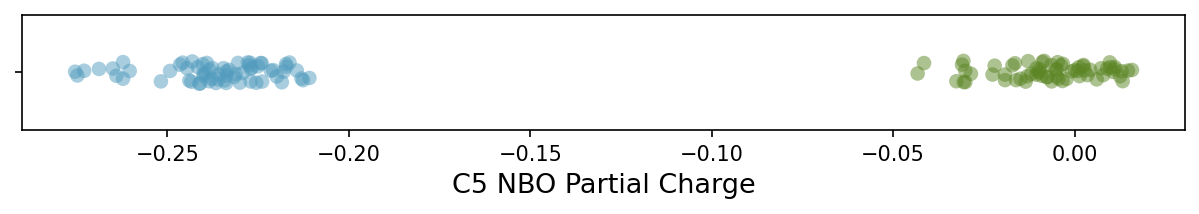

In [11]:
# strip plot colored by R3 substituent
f = plt.figure(figsize=(10,1),dpi=150)
sns.stripplot(x=dft_df['C5_NBO-q'], color=onehot_df['R3_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R3_Colors'])
plt.xlabel('C5 NBO Partial Charge', size=13)

# plt.savefig('c5_nbo_q_stripplot.svg',dpi=400)

Text(0.5, 0, 'R2 NBO Partial Charge')

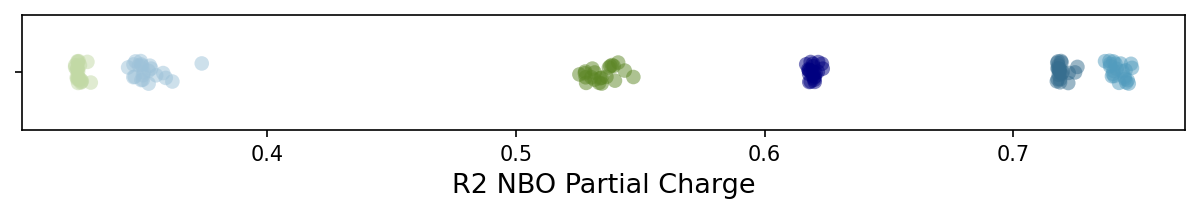

In [12]:
# strip plot colored by R2 substituent
f = plt.figure(figsize=(10,1),dpi=150)
sns.stripplot(x=dft_df['C3sub_NBO-q'], color=onehot_df['R2_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R2_Colors'])
plt.xlabel('R2 NBO Partial Charge', size=13)

# plt.savefig('r2_nbo_q_stripplot.svg',dpi=400)

Text(0.5, 0, 'R1 NBO Partial Charge')

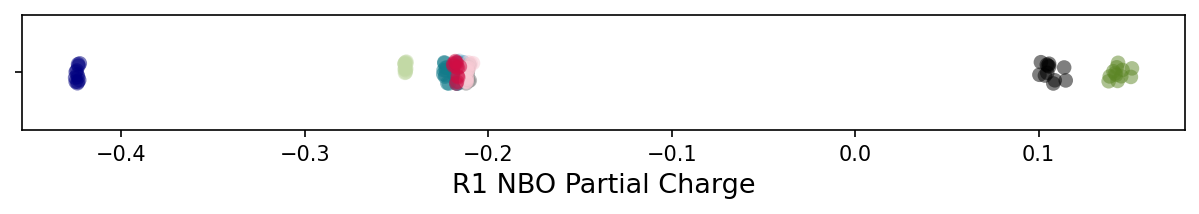

In [13]:
f = plt.figure(figsize=(10,1),dpi=150)
sns.stripplot(x=dft_df['Nsub_NBO-q'], color=onehot_df['R1_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R1_Colors'])
plt.xlabel('R1 NBO Partial Charge', size=13)

# plt.savefig('nsub_nbo_q_stripplot.svg',dpi=400)

(-0.225, -0.2075)

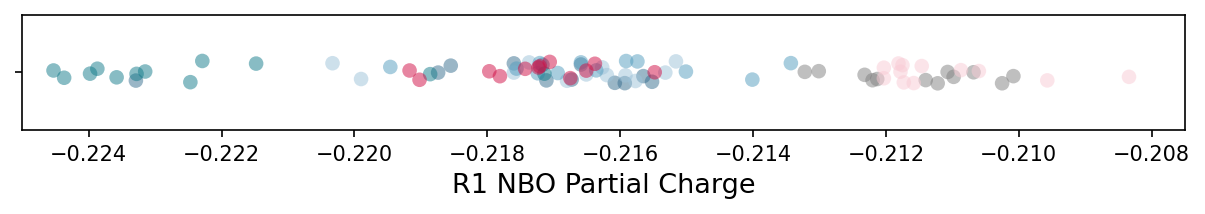

In [14]:
f = plt.figure(figsize=(10,1),dpi=150)
sns.stripplot(x=dft_df['Nsub_NBO-q'], color=onehot_df['R1_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R1_Colors'])
plt.xlabel('R1 NBO Partial Charge', size=13)
plt.xlim(-0.225,-0.2075)

# plt.savefig('nsub_nbo_q_stripplot_ZOOM.svg',dpi=400)

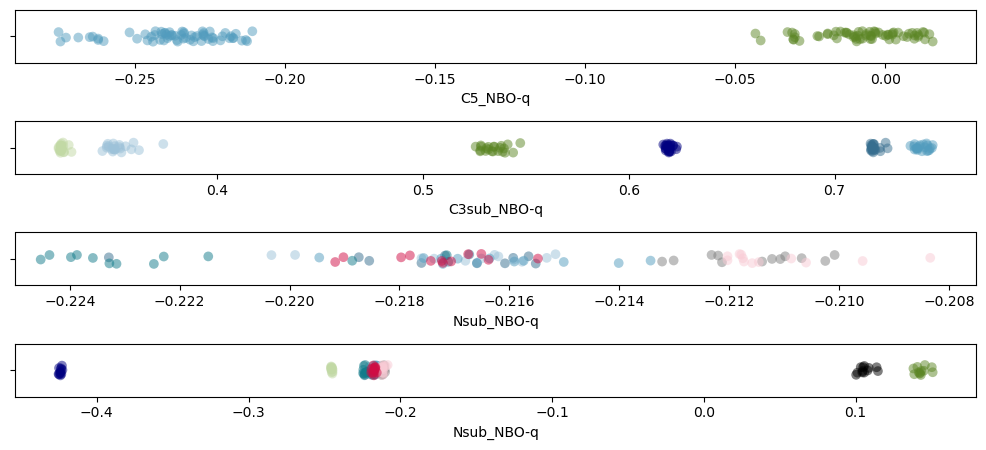

In [15]:
# plotting all DFT important descriptors correlation with stability, colored by C5 substituent
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))

sns.stripplot(ax=ax1, x=dft_df['C5_NBO-q'], color=onehot_df['R3_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R3_Colors'])
sns.stripplot(ax=ax2, x=dft_df['C3sub_NBO-q'], color=onehot_df['R2_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R2_Colors'])
sns.stripplot(ax=ax3, x=dft_df['Nsub_NBO-q'], color=onehot_df['R1_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R1_Colors'])
sns.stripplot(ax=ax4, x=dft_df['Nsub_NBO-q'], color=onehot_df['R1_Colors'], size=7, alpha=0.5, edgecolors=onehot_df['R1_Colors'])

ax3.set_xlim(-0.225,-0.2075)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig('categorical_stripplots.svg',dpi=400)

plt.show()

In [16]:
# listing dft important descriptors
dft_pfi = ['Cofactor','dG_C5','R1_group','R1_Colors','R2_group','R2_Colors','R3_group','R3_Colors',
           'N1_NBO-q','C2_NBO-q','C3_NBO-q','C5_NBO-q','C4H_NBO-q',
           'C3_f+','C4_f+','C5_f+','C6_f+','C4H_f+',
           'N1_f-','C3_f-','C3sub_f-','C5_f-','C6_f-','C4H_f-']

dft_pfi_df = dft_df[dft_pfi]

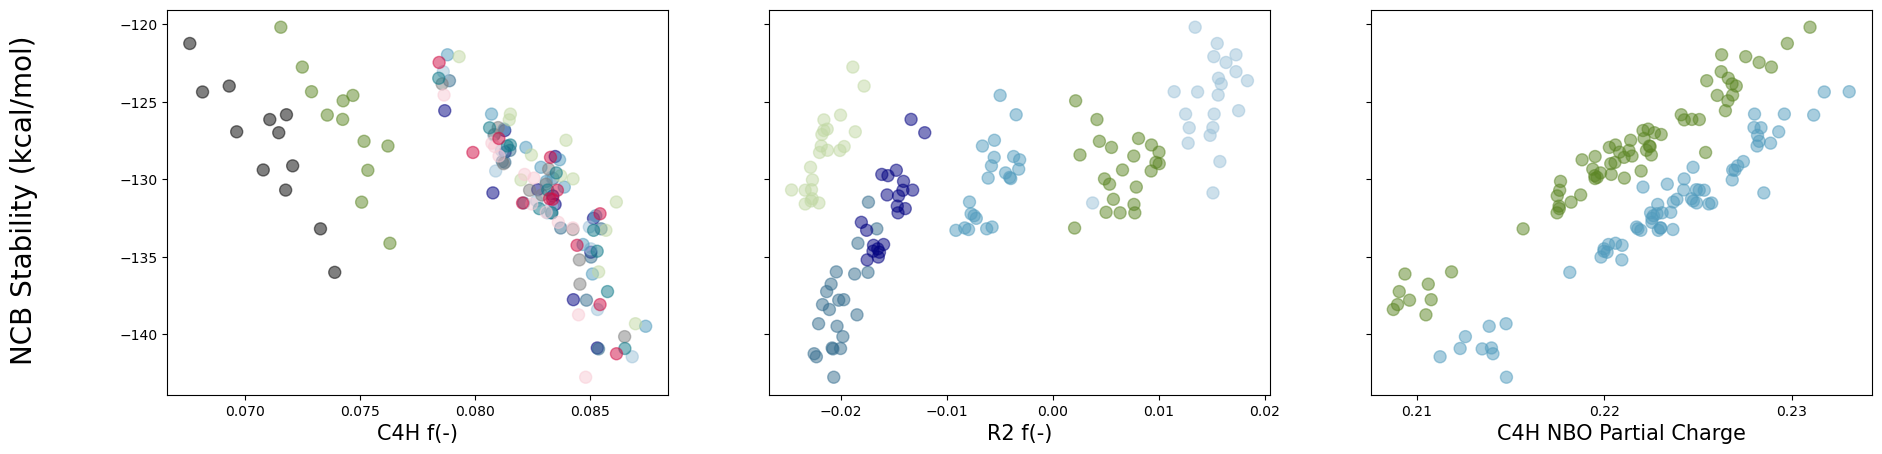

In [45]:
# looking at key ones
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)

fig.set_figheight(5)
fig.set_figwidth(22)

# R1
ax1.scatter(dft_pfi_df['C4H_f-'],dft_pfi_df['dG_C5'],color=dft_pfi_df['R1_Colors'],
            alpha=0.50,edgecolor=dft_pfi_df['R1_Colors'],s=75)
# R2
ax2.scatter(dft_pfi_df['C3sub_f-'],dft_pfi_df['dG_C5'],color=dft_pfi_df['R2_Colors'],
            alpha=0.50,edgecolor=dft_pfi_df['R2_Colors'],s=75)
# R3
ax3.scatter(dft_pfi_df['C4H_NBO-q'],dft_pfi_df['dG_C5'],color=dft_pfi_df['R3_Colors'],
            alpha=0.50,edgecolor=dft_pfi_df['R3_Colors'],s=75)

# adding labels
ax1.set_xlabel('C4H f(-)',fontsize=15)
ax2.set_xlabel('R2 f(-)',fontsize=15)
ax3.set_xlabel('C4H NBO Partial Charge',fontsize=15)


fig.text(0.06,0.5,'NCB Stability (kcal/mol)',ha='center',va='center',rotation='vertical',
         fontsize=20)

# changing ticks when necessary
ax1.set_xticks([0.070,0.075,0.080,0.085])
ax2.set_xticks([-0.02,-0.01,0.00,0.01,0.02])
ax3.set_xticks([0.21,0.22,0.23])

plt.savefig('key_descp_vs_stab_sub-color.svg',dpi=600)

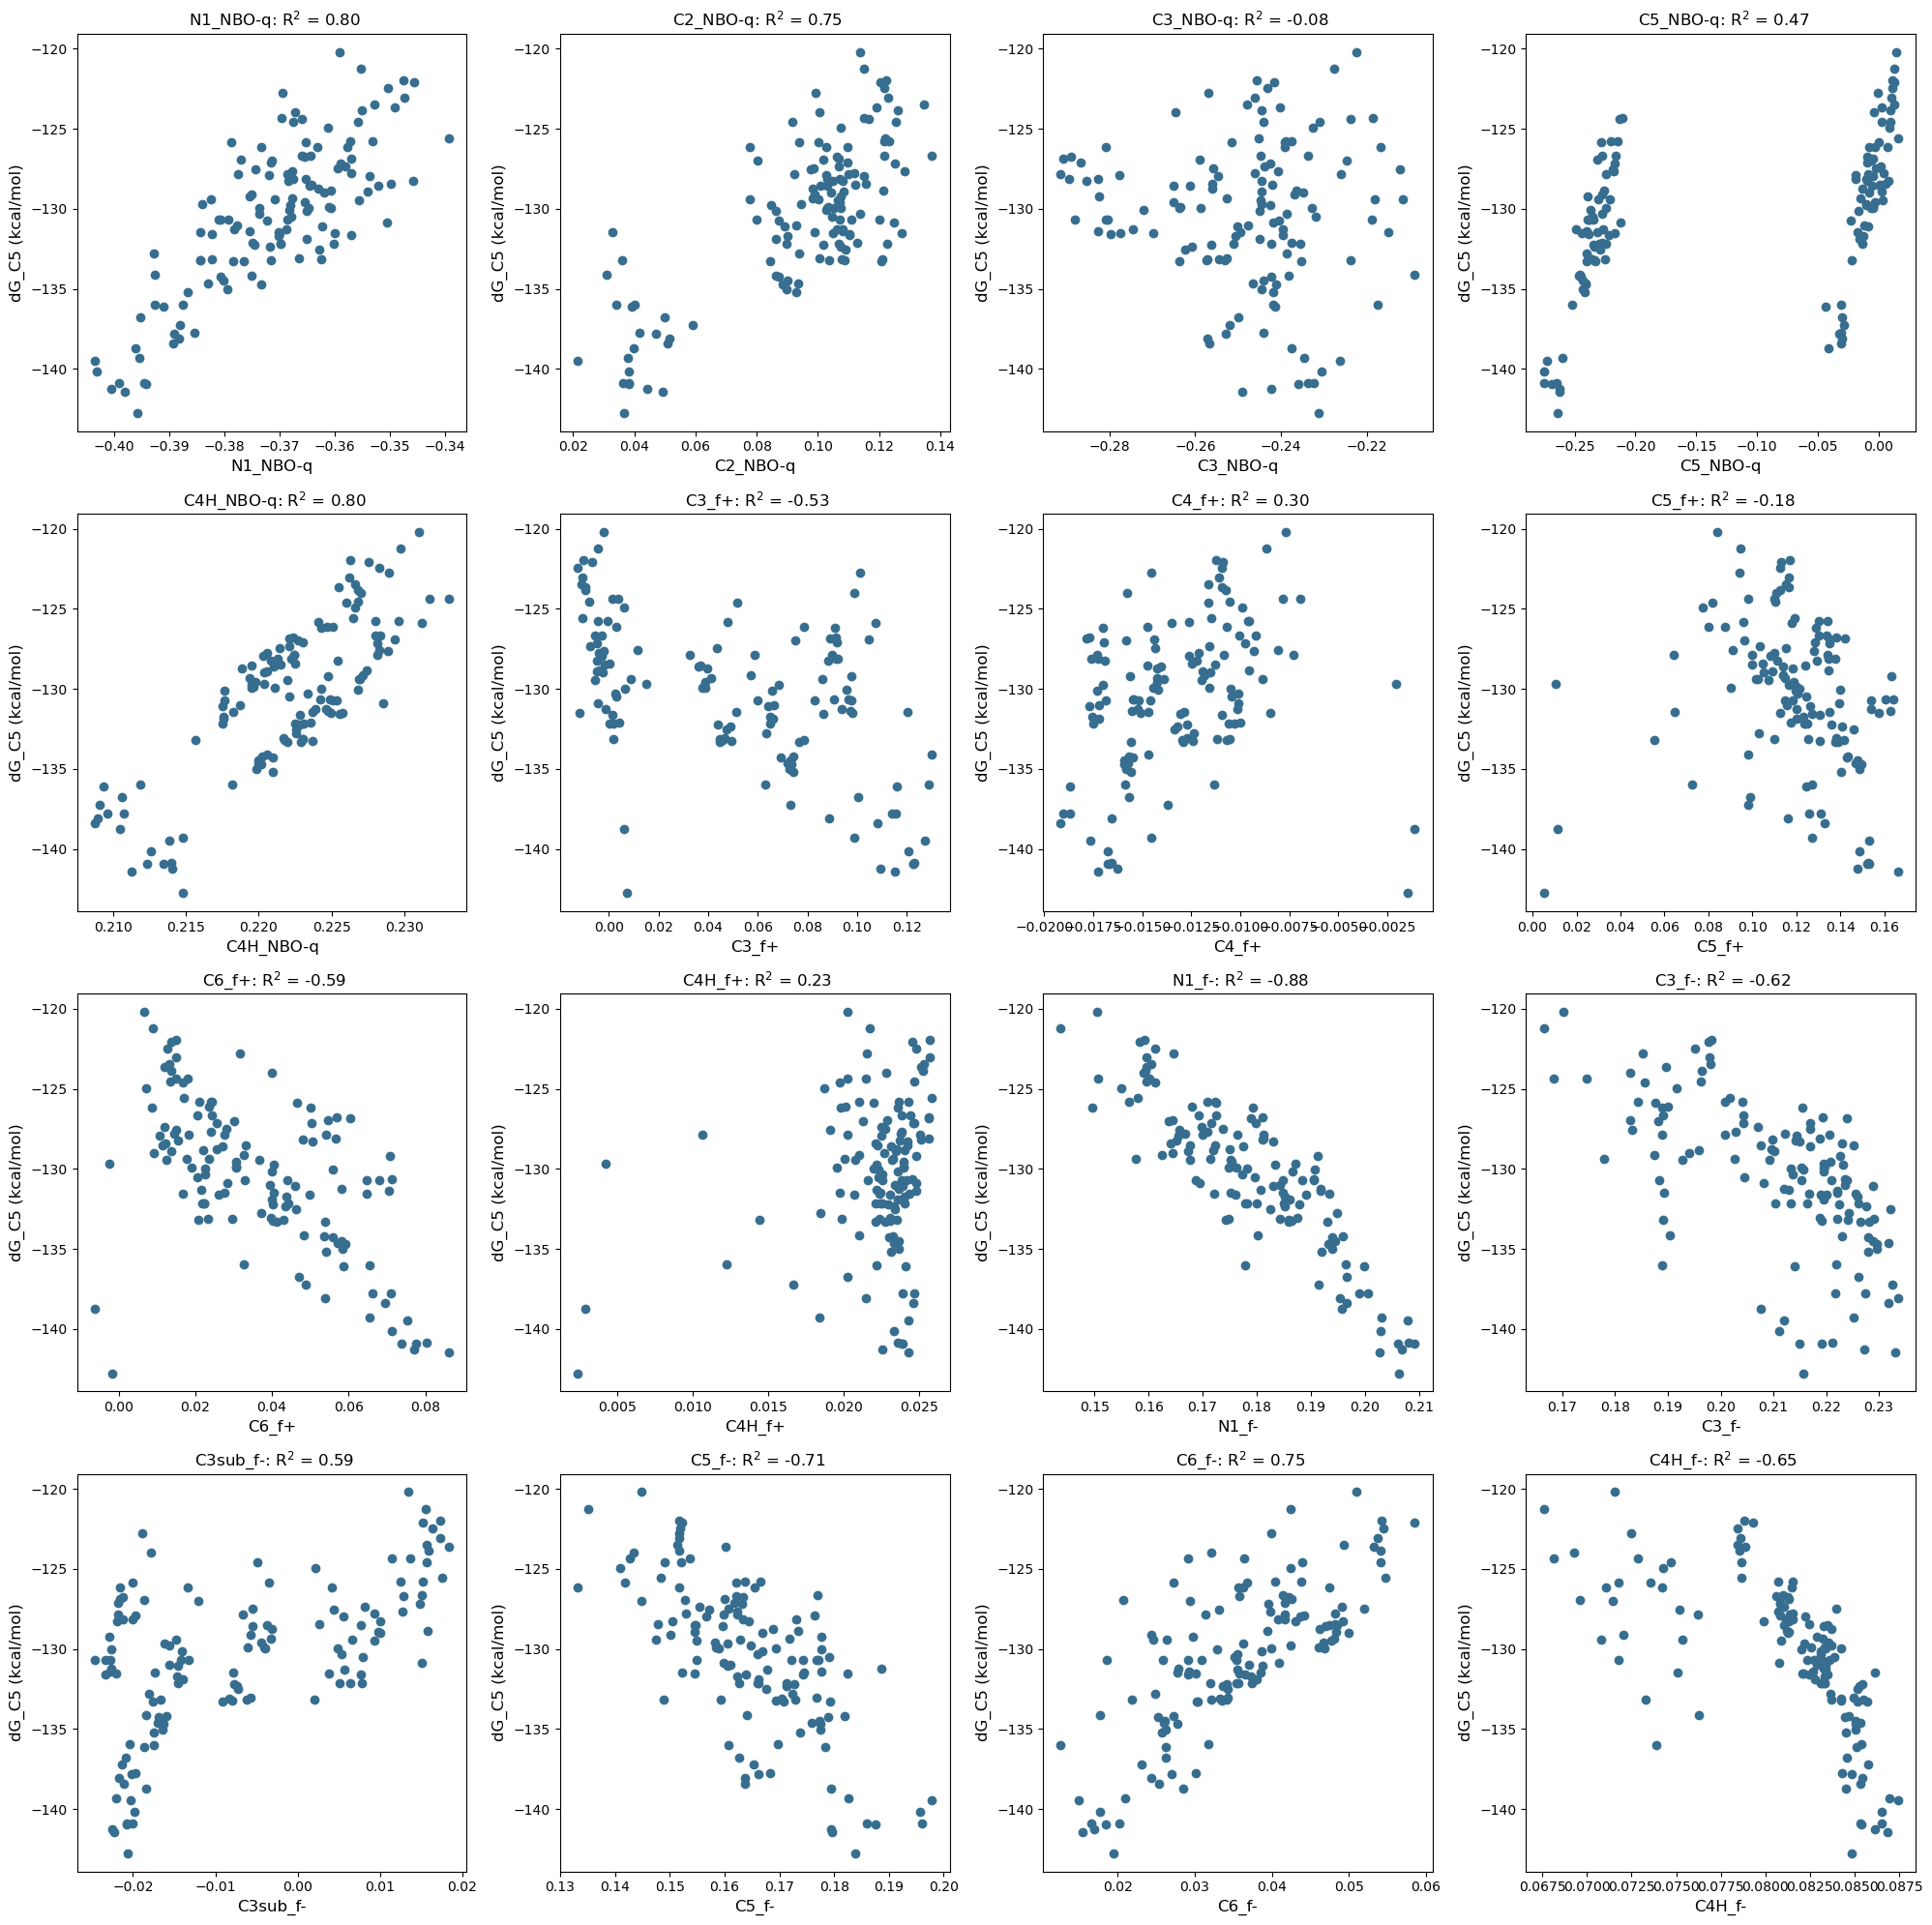

In [26]:
from sklearn.metrics import r2_score
import scipy

# plotting all dft important descriptors correlation with stability, colored by C5 substituent
nrows = 4
ncols = 4
initial_plot_counter = 1

fig = plt.figure(figsize=(20,20))

for col in dft_pfi_df.columns[8:]:
    plt.subplot(nrows, ncols, initial_plot_counter)
    plt.scatter(dft_pfi_df[col],dft_pfi_df['dG_C5'],color=paton_teal_blue)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dft_pfi_df[col],
                                                                     dft_pfi_df['dG_C5'])
    plt.title(f' {col}: R$^2$ = {"{:.2f}".format(r_value)}'.format(r2_score(dft_pfi_df[col], 
                                                                   dft_pfi_df['dG_C5'])))
#     plt.title(f'{col}' + ' R2: ' + str(r2_score(dft_pfi_df[col],dft_pfi_df['dG_C5'])))
#     plt.title(f'{col}',fontsize=15)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('dG_C5 (kcal/mol)',fontsize=12)
#     r2_here = r2_score(dft_pfi_df['dG_C5'], dft_pfi_df[col])
#     plt.annotate("r-squared = {:.3f}".format(r2_score(dft_pfi_df['dG_C5'], dft_pfi_df[col])), (0, 1))
    initial_plot_counter += 1
fig.tight_layout()
plt.show()

# plt.savefig('correlation_panel.svg',dpi=400)